In [1]:
from report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('classicalCartPole-v1')

In [4]:
# select best score per run
episodes_grouped = episodes.groupby(['trial_id', 'run_id']).agg(
    {'evaluation_score': 'max'}).reset_index()

# find best trial based on average evaluation score
episodes_grouped = episodes_grouped.groupby(['trial_id']).agg(
    {'evaluation_score': 'mean'}).reset_index()

In [5]:
# get the trial id of the best trial
best_trial_id = \
episodes_grouped[episodes_grouped['evaluation_score'] == episodes_grouped['evaluation_score'].max()]['trial_id'].values[
    0]
best_trial = episodes[episodes['trial_id'] == best_trial_id]

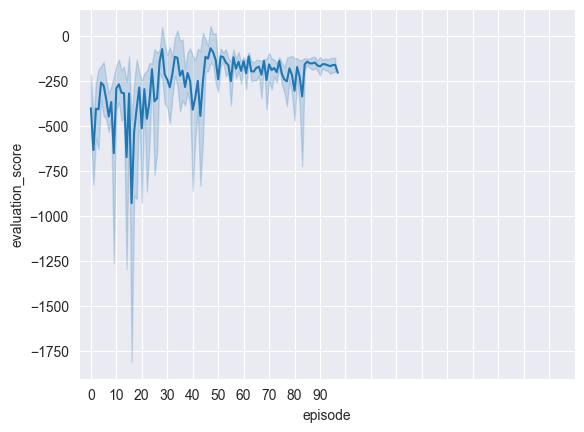

In [6]:
# plot the trial with the best average evaluation score
sns.lineplot(x='episode', y='evaluation_score', data=best_trial)
plt.xticks(range(0, 200, 10))
plt.show()
